In [81]:
#importing neccesary libraries that will be needed for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [82]:
# Loading CSV file into a DataFrame
df = pd.read_csv('train.csv')
print("Data loaded successfully.")

Data loaded successfully.


After sucessfully importing the neccesary libraries and have loeaded the csv file into the dataframe.
Now, I will go through the csv file in order to understand the data before I start cleaning

In [83]:
#checking the first 5 rows of the dataframe
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [84]:
#printing all column names in the dataframe
print(df.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [85]:
#checking the info of the dataframe to see data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [86]:
#checking for missing values in each column in the dataframe
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

After seeing the data, now I will start cleaning to feed the model with correct data, so as to receive correct results from the model

In [87]:
#striping white spaces and converting all column names to lowercase
df.columns = [col.lower().strip() for col in df.columns]


In [88]:
#checking all column names in the dataframe
df.columns

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street',
       'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig',
       'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype',
       'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd',
       'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype',
       'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual',
       'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1',
       'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating',
       'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paveddrive

In [89]:
#Dropping columns that are not useful for the analysis
df = df.drop(columns=['poolqc', 'miscfeature', 'alley', 'fence'])
print("Columns dropped successfully.")

Columns dropped successfully.


In [90]:
#saving the changes made to the dataframe into a new csv file to better view the changes
df.to_csv("train_sample.csv")

In [91]:
#identifying particular columns with missing values that need to be replaced with "none"
cols_to_replace = [
    'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
    'fireplacequ', 'garagetype', 'garagefinish', 'garagequal', 'garagecond'
]

for col in cols_to_replace:
    print(f"Unique values in {col}: {df[col].unique()}")

df[cols_to_replace] = df[cols_to_replace].fillna("none")

for col in cols_to_replace:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in bsmtqual: ['Gd' 'TA' 'Ex' nan 'Fa']
Unique values in bsmtcond: ['TA' 'Gd' nan 'Fa' 'Po']
Unique values in bsmtexposure: ['No' 'Gd' 'Mn' 'Av' nan]
Unique values in bsmtfintype1: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
Unique values in bsmtfintype2: ['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']
Unique values in fireplacequ: [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
Unique values in garagetype: ['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
Unique values in garagefinish: ['RFn' 'Unf' 'Fin' nan]
Unique values in garagequal: ['TA' 'Fa' 'Gd' nan 'Ex' 'Po']
Unique values in garagecond: ['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
Unique values in bsmtqual: ['Gd' 'TA' 'Ex' 'none' 'Fa']
Unique values in bsmtcond: ['TA' 'Gd' 'none' 'Fa' 'Po']
Unique values in bsmtexposure: ['No' 'Gd' 'Mn' 'Av' 'none']
Unique values in bsmtfintype1: ['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' 'none' 'LwQ']
Unique values in bsmtfintype2: ['Unf' 'BLQ' 'none' 'ALQ' 'Rec' 'LwQ' 'GLQ']
Unique values in fireplacequ: ['none' '

In [92]:
#verifying that there are no missing columns in the specified columns after replacement
print(df[cols_to_replace].isna().sum())

bsmtqual        0
bsmtcond        0
bsmtexposure    0
bsmtfintype1    0
bsmtfintype2    0
fireplacequ     0
garagetype      0
garagefinish    0
garagequal      0
garagecond      0
dtype: int64


For column LotFrontage (linear feet of street connected to property), we should replace the NA values with a reasonable estimate, such as the median of the surrounding Neighborhood. This is a better strategy than using the overall mean, as lot frontage can vary significantly by neighborhood.

In [93]:
# Replace missing values in 'lotfrontage' with the median value of the corresponding 'neighborhood'
df['lotfrontage'] = df.groupby('neighborhood')['lotfrontage'].transform(
    lambda x: x.fillna(x.median())
)
print("Missing values in 'lotfrontage' replaced with neighborhood median successfully.")

Missing values in 'lotfrontage' replaced with neighborhood median successfully.


In [94]:
#checking if there are still any missing values in the 'lotfrontage' column
df['lotfrontage'].isna().sum()

0

For MasVnrArea (Masonry veneer area), NA likely means there is no masonry veneer, so we can replace the missing values with 0.

In [95]:
df["masvnrarea"] = df["masvnrarea"].fillna(0)

In [96]:
#checking if there are still any missing values in the 'masvnrarea' column
df["masvnrarea"].isna().sum()
df.to_csv("train_before_log.csv")

The target variable, saleprice, has a skewed distribution. The RMSE metric requires that we take the logarithm of saleprice. Therefore, the first step is to create a new LogSalePrice column. This will make the distribution more normal, which is good for linear models.
Some of the numerical features in the dataset, such as grlivarea, bsmtfinsf1, lotarea, and 1stflrsf also have skewed distributions. We should also apply a log transformation to these to normalize them and help train the model better.

In [97]:
# The logarithm of a value less than or equal to zero is undefined.
# We will add a small constant (e.g., 1) to the columns to handle this,
# so that log(0) becomes log(1), which is 0.

# List of columns to log-transform
cols_to_log = ['saleprice', 'grlivarea', 'bsmtfinsf1', 'lotarea', '1stflrsf']

for col in cols_to_log:
    print(f"Minimum value in {col}: {df[col].min()}")
    df[f'log_{col}'] = np.log1p(df[col])

# Print the first few rows of the updated dataframe to verify the new columns
print(df[['id'] + [f'log_{col}' for col in cols_to_log]].head())


Minimum value in saleprice: 34900
Minimum value in grlivarea: 334
Minimum value in bsmtfinsf1: 0
Minimum value in lotarea: 1300
Minimum value in 1stflrsf: 334
   id  log_saleprice  log_grlivarea  log_bsmtfinsf1  log_lotarea  log_1stflrsf
0   1      12.247699       7.444833        6.561031     9.042040      6.753438
1   2      12.109016       7.141245        6.886532     9.169623      7.141245
2   3      12.317171       7.488294        6.188264     9.328212      6.825460
3   4      11.849405       7.448916        5.379897     9.164401      6.869014
4   5      12.429220       7.695758        6.486161     9.565284      7.044033


I will drop the original columns of thosw which we just found the logarithm of.Reasons being that if I include both the original and the log-transformed version of the same feature in my model, I will introduce multicollinearity. This means two of my input features are highly correlated, it can confuse the model, make the coefficients less interpretable, and sometimes lead to unstable model performance.

In [98]:
cols_to_drop = ['saleprice', 'grlivarea', 'bsmtfinsf1', 'lotarea', '1stflrsf']
df = df.drop(columns=cols_to_drop, axis=1)
print("Original columns dropped successfully.")
# checking the columns to confirm they have been dropped
print(df.columns)

Original columns dropped successfully.
Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'street', 'lotshape',
       'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood',
       'condition1', 'condition2', 'bldgtype', 'housestyle', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'roofstyle', 'roofmatl',
       'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea', 'exterqual',
       'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure',
       'bsmtfintype1', 'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf',
       'totalbsmtsf', 'heating', 'heatingqc', 'centralair', 'electrical',
       '2ndflrsf', 'lowqualfinsf', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual',
       'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype',
       'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal',
       'garagecond', 'paveddrive', 'wooddecksf', 'openporch

The YearBuilt and YearRemodAdd columns are useful, but I will combine them into a single, more informative feature like yearssinceremod. This gives a better sense of the age of the house after its last major renovation.

In [99]:
df['yearssinceremod'] = df['yrsold'] - df['yearremodadd']

# drop the original columns to avoid multicollinearity
df = df.drop(columns=['yearbuilt', 'yearremodadd', 'yrsold'], axis=1)
print(df[['id', 'yearssinceremod']].head())

   id  yearssinceremod
0   1                5
1   2               31
2   3                6
3   4               36
4   5                8


In [100]:
print(df.columns)

Index(['id', 'mssubclass', 'mszoning', 'lotfrontage', 'street', 'lotshape',
       'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood',
       'condition1', 'condition2', 'bldgtype', 'housestyle', 'overallqual',
       'overallcond', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd',
       'masvnrtype', 'masvnrarea', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc',
       'centralair', 'electrical', '2ndflrsf', 'lowqualfinsf', 'bsmtfullbath',
       'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr',
       'kitchenqual', 'totrmsabvgrd', 'functional', 'fireplaces',
       'fireplacequ', 'garagetype', 'garageyrblt', 'garagefinish',
       'garagecars', 'garagearea', 'garagequal', 'garagecond', 'paveddrive',
       'wooddecksf', 'openporchsf', 'enclosedporch', '3ssnporch',
       'screenporch', 'poolarea',

 For ordinal categorical features, where the categories have a clear order (e.g., ExterQual with Ex, Gd, TA, Fa, Po), I can use label encoding to map them to a numerical scale.For example Gd 3, TA 2, and so on. This preserves the order information for the model.

In [101]:
# We will manually map the ordinal features to numerical values based on their quality rating. The data description provides the order.
# The `Ex` (Excellent) quality should have a higher value than `Po` (Poor).

ordinal_features = {
    'exterqual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
    'extercond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
    'bsmtqual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
    'bsmtcond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
    'bsmtexposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0},
    'bsmtfintype1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0},
    'bsmtfintype2': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0},
    'heatingqc': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    'kitchenqual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    'fireplacequ': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
    'garagequal': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
    'garagecond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
}

for col, mapping in ordinal_features.items():
    df[col] = df[col].map(mapping)

In [102]:
# We will separate nominal features from the rest of the dataframe to perform one-hot encoding
nominal_features = ['mszoning', 'street', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope',
                    'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle',
                    'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'foundation', 'heating',
                    'centralair', 'electrical', 'functional', 'garagetype', 'paveddrive',
                    'saletype', 'salecondition', 'mosold']

# Create dummy variables for all nominal features
df = pd.get_dummies(df, columns=nominal_features, drop_first=True)
# drop_first=True is important to avoid multicollinearity by dropping the first category

In [103]:
# checking the final cleaned dataframe
print("Shape of the cleaned training dataframe:", df.shape)
print("\nFirst 5 rows of the final cleaned dataframe:")
print(df.head())
df.to_csv("cleaned_train.csv", index=False)

Shape of the cleaned training dataframe: (1460, 212)

First 5 rows of the final cleaned dataframe:
   id  mssubclass  lotfrontage  overallqual  overallcond  masvnrarea  \
0   1          60         65.0            7            5       196.0   
1   2          20         80.0            6            8         0.0   
2   3          60         68.0            7            5       162.0   
3   4          70         60.0            7            5         0.0   
4   5          60         84.0            8            5       350.0   

   exterqual  extercond  bsmtqual  bsmtcond  ...  mosold_3  mosold_4  \
0          4          3       4.0       3.0  ...     False     False   
1          3          3       4.0       3.0  ...     False     False   
2          4          3       4.0       3.0  ...     False     False   
3          3          3       3.0       4.0  ...     False     False   
4          4          3       4.0       3.0  ...     False     False   

   mosold_5  mosold_6  mosold_7  mo

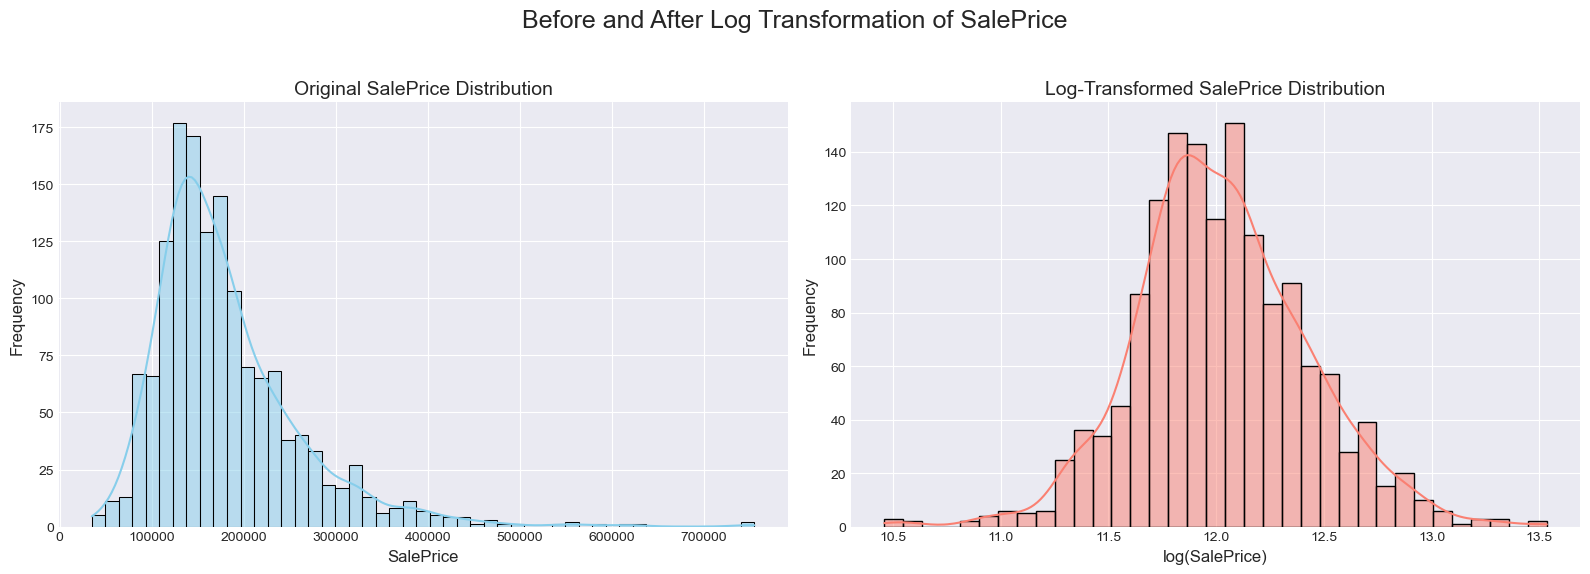

In [104]:
# Drop 'id' column as it's not needed for modeling
df =df.drop("id", axis=1)

# Set a professional plotting style
plt.style.use('seaborn-v0_8-darkgrid')

# 1. Histograms of Transformed Features and Target
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

df1=pd.read_csv("train_before_log.csv")
# Histogram of the original SalePrice
sns.histplot(df1['saleprice'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Original SalePrice Distribution', fontsize=14)
axes[0].set_xlabel('SalePrice', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)

# Histogram of the log-transformed SalePrice
sns.histplot(df['log_saleprice'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Log-Transformed SalePrice Distribution', fontsize=14)
axes[1].set_xlabel('log(SalePrice)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)

plt.suptitle('Before and After Log Transformation of SalePrice', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


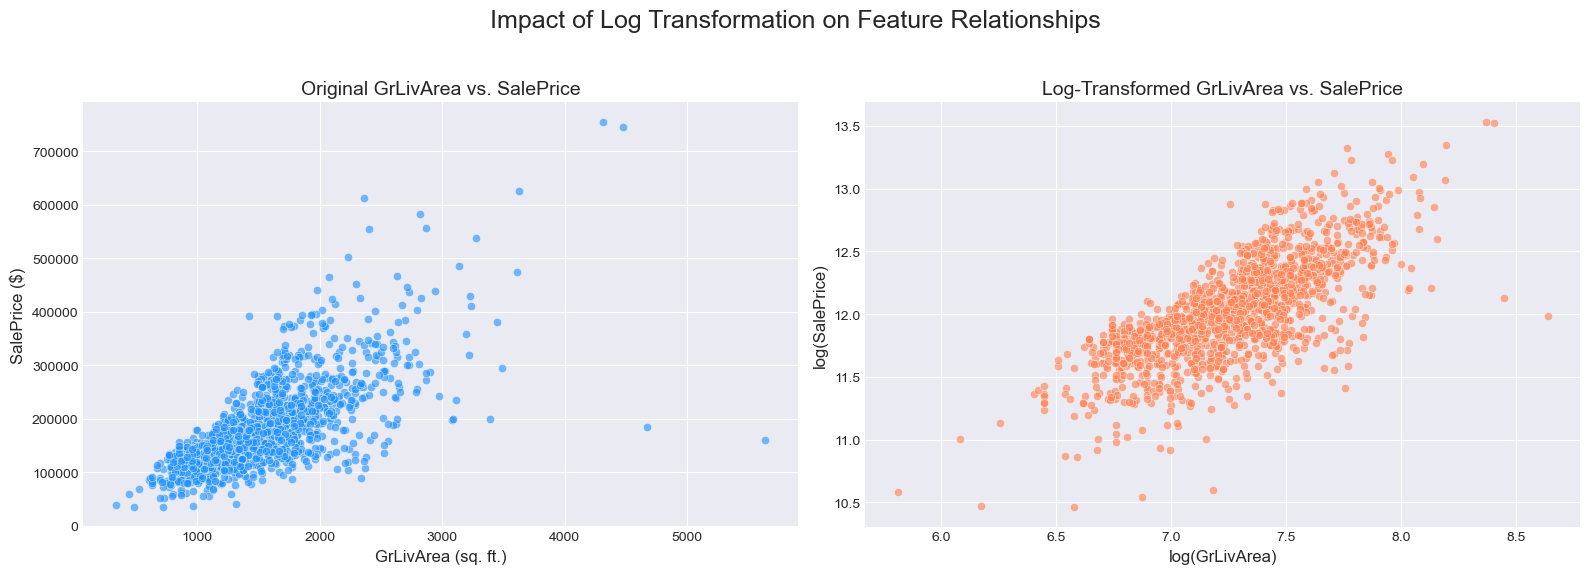

In [105]:
# 2. Scatter Plots of Transformed vs. Original Features
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Before log transformation
sns.scatterplot(x='grlivarea', y='saleprice', data=df1, ax=axes[0], color='dodgerblue', alpha=0.6)
axes[0].set_title('Original GrLivArea vs. SalePrice', fontsize=14)
axes[0].set_xlabel('GrLivArea (sq. ft.)', fontsize=12)
axes[0].set_ylabel('SalePrice ($)', fontsize=12)

# After log transformation
sns.scatterplot(x='log_grlivarea', y='log_saleprice', data=df, ax=axes[1], color='coral', alpha=0.6)
axes[1].set_title('Log-Transformed GrLivArea vs. SalePrice', fontsize=14)
axes[1].set_xlabel('log(GrLivArea)', fontsize=12)
axes[1].set_ylabel('log(SalePrice)', fontsize=12)

plt.suptitle('Impact of Log Transformation on Feature Relationships', fontsize=18)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


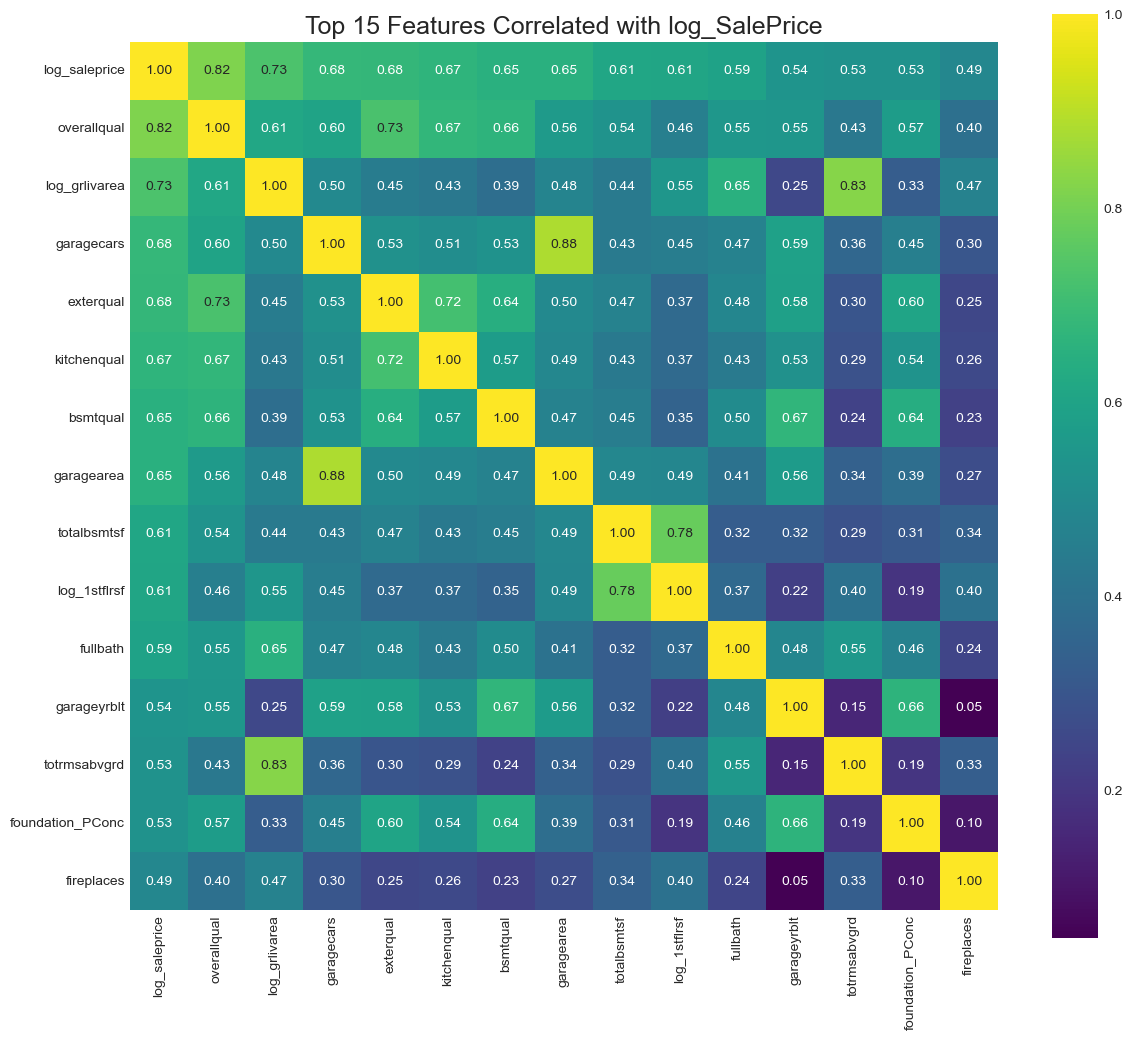

In [106]:
# Correlation Heatmap of Numerical Features
# Selecting only the numerical columns for the heatmap
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()


# Calculate the correlation matrix for a focused view on a few important features
k = 15 # Number of top features to show
corrmat = df.corr(numeric_only=True) # Ensure correlation is on numerical data only
cols = corrmat.nlargest(k, 'log_saleprice')['log_saleprice'].index
focused_corrmat = df[cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(focused_corrmat, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, cmap='viridis')
plt.title('Top 15 Features Correlated with log_SalePrice', fontsize=18)
plt.show()


In [107]:
#%pip install xgboost
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [108]:
#loading data
dff = pd.read_csv('test.csv')   

print(dff.columns)
#striping white spaces and converting all column names to lowercase
dff.columns = [col.lower().strip() for col in dff.columns]

#Dropping columns that are not useful for the analysis
dff = dff.drop(columns=['poolqc', 'miscfeature', 'alley', 'fence'])
print("Columns dropped successfully.")

#identifying particular columns with missing values that need to be replaced with "none"
cols_to_replace = [
    'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
    'fireplacequ', 'garagetype', 'garagefinish', 'garagequal', 'garagecond'
]

for col in cols_to_replace:
    print(f"Unique values in {col}: {dff[col].unique()}")

dff[cols_to_replace] = dff[cols_to_replace].fillna("none")

for col in cols_to_replace:
    print(f"Unique values in {col}: {dff[col].unique()}")

#verifying that there are no missing columns in the specified columns after replacement
print(dff[cols_to_replace].isna().sum())

# Replace missing values in 'lotfrontage' with the median value of the corresponding 'neighborhood'
dff['lotfrontage'] = dff.groupby('neighborhood')['lotfrontage'].transform(
    lambda x: x.fillna(x.median())
)
print("Missing values in 'lotfrontage' replaced with neighborhood median successfully.")

#checking if there are still any missing values in the 'lotfrontage' column
dff['lotfrontage'].isna().sum()

dff["masvnrarea"] = dff["masvnrarea"].fillna(0)
#checking if there are still any missing values in the 'masvnrarea' column
dff["masvnrarea"].isna().sum()

# List of columns to log-transform
cols_to_log = ['grlivarea', 'bsmtfinsf1', 'lotarea', '1stflrsf']

for col in cols_to_log:
    print(f"Minimum value in {col}: {dff[col].min()}")
    dff[f'log_{col}'] = np.log1p(dff[col])

# Print the first few rows of the updated dataframe to verify the new columns
print(dff[['id'] + [f'log_{col}' for col in cols_to_log]].head())

cols_to_drop = ['grlivarea', 'bsmtfinsf1', 'lotarea', '1stflrsf']
dff = dff.drop(columns=cols_to_drop, axis=1)
print("Original columns dropped successfully.")
# checking the columns to confirm they have been dropped
print(dff.columns)

dff['yearssinceremod'] = dff['yrsold'] - dff['yearremodadd']   
# drop the original columns to avoid multicollinearity
dff = dff.drop(columns=['yearbuilt', 'yearremodadd', 'yrsold'], axis=1)
print(dff[['id', 'yearssinceremod']].head()) 

print(dff.columns)

ordinal_features = {
    'exterqual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
    'extercond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
    'bsmtqual': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
    'bsmtcond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
    'bsmtexposure': {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0},
    'bsmtfintype1': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0},
    'bsmtfintype2': {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0},
    'heatingqc': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    'kitchenqual': {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, 'Po': 0},
    'fireplacequ': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
    'garagequal': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
    'garagecond': {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0},
}

for col, mapping in ordinal_features.items():
    dff[col] = dff[col].map(mapping)

# We will separate nominal features from the rest of the dataframe to perform one-hot encoding
nominal_features = ['mszoning', 'street', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope',
                    'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle',
                    'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'foundation', 'heating',
                    'centralair', 'electrical', 'functional', 'garagetype', 'paveddrive',
                    'saletype', 'salecondition', 'mosold']

# Create dummy variables for all nominal features
dff = pd.get_dummies(dff, columns=nominal_features, drop_first=True)
# drop_first=True is important to avoid multicollinearity by dropping the first category


dff.to_csv("cleaned_test.csv", index=False)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [109]:
df_train = pd.read_csv("cleaned_train.csv")
df_test = pd.read_csv("cleaned_test.csv")

#Preparing data for modeling
# Separating the target variable
y = df['log_saleprice']


# Select features from both datasets to ensure consistency
train_features = df_train.drop(['log_saleprice'], axis=1)
test_features = df_test.drop('id', axis=1)

# One-hot encode categorical features
combined_df = pd.concat([train_features, test_features], axis=0)
combined_df = pd.get_dummies(combined_df)

# Separate the data back into train and test sets
X = combined_df.iloc[:len(df_train), :]
X_test = combined_df.iloc[len(df_train):, :]
X, X_test = X.align(X_test, join='inner', axis=1)

# Training the XGBoost Model
model = xgb.XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X, y)

print("XGBoost model training complete!")

# Let's see how the model performed on the training data.
train_preds = model.predict(X)
train_rmse = np.sqrt(mean_squared_error(y, train_preds))
print(f"Root Mean Squared Error (RMSE) on the training data: {train_rmse:.4f}")


XGBoost model training complete!
Root Mean Squared Error (RMSE) on the training data: 0.0065


In [110]:
print("Making predictions on the test set...")

# Make predictions on the pre-processed test data
test_preds_log = model.predict(X_test)

# Inverse transform the predictions from log scale back to original scale
test_preds = np.expm1(test_preds_log)

# Create the submission DataFrame as required by the competition
submission = pd.DataFrame({
    "Id": df_test["id"],
    "SalePrice": test_preds
})

# Saving the submission DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully!")

Making predictions on the test set...
Submission file 'submission.csv' created successfully!
